In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<h1><center>BRUTE FORCE</center></h1>

In [2]:
brute_time = pd.read_csv("time2.csv")

In [3]:
brute_time.head(5)

,num_of_particles,t_point_create,t_point_write,t_init,t_brute
0,100,441,2401,71,5749
1,100,532,1645,84,6665
2,100,448,1964,106,6645
3,300,1272,3490,241,46588
4,300,1158,4714,226,46572


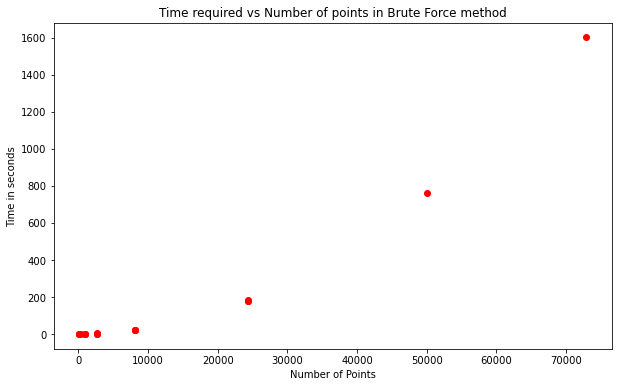

In [4]:
plt.figure(figsize=(10, 6))
plt.title("Time required vs Number of points in Brute Force method")
plt.xlabel("Number of Points")
plt.ylabel("Time in seconds")
plt.scatter(x=brute_time.num_of_particles, y=brute_time.t_brute/10**6, color="r", label="Time points from program run")
plt.show()

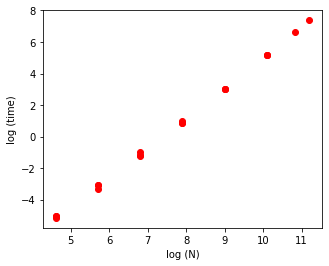

In [5]:
x = np.log(brute_time.num_of_particles)
y = np.log(brute_time.t_brute/10**6)

plt.figure(figsize=(5, 4))
plt.xlabel("log (N)")
plt.ylabel("log (time)")
plt.scatter(x, y, color="r")
plt.show()

## Linear Regression to find order

In [6]:
m,c,a = 0,0,0.02

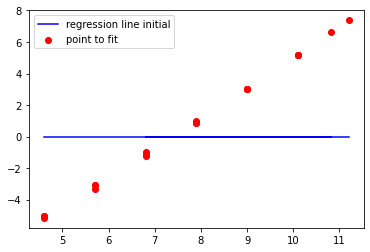

In [7]:
plt.plot(x,m*x+c,color = "b",label="regression line initial")
plt.scatter(x, y, color="r", label="point to fit")
plt.legend()
plt.show()

In [8]:
error = 0
error_diff = 1
while error_diff>0.0001:
    diff = y - (m*x + c)
    error_diff = abs(np.sum(diff**2) - error)
    error = np.sum(diff**2)
    dm = np.sum(diff*x) / len(x)
    dc = np.sum(diff) / len(x)
    m += dm*a
    c += dc*a
    print('error =', error)
    print('m=',m,'c=',c,'\n\n')

error = 319.10646091355596
m= 0.26752459533428485 c= 0.013324544776533586 


error = 268.22920742680384
m= 0.19092042800246223 c= -0.014909083873910245 


error = 263.08553846120896
m= 0.21662448647176402 c= -0.030754398263002566 


error = 261.9860937086235
m= 0.2119075550639743 c= -0.050250156808327104 


error = 261.245864307798
m= 0.21623107679953096 c= -0.068627954845569 


error = 260.53912042517175
m= 0.21786286023563828 c= -0.08730552056271798 


error = 259.8370654886118
m= 0.22029098329694138 c= -0.1058613962327829 


error = 259.13714945079073
m= 0.22247841834520066 c= -0.12442092847879457 


error = 258.4391422586536
m= 0.22473348713905414 c= -0.142946894639071 


error = 257.7430189405158
m= 0.22696452849386411 c= -0.1614504051171915 


error = 257.0487726647387
m= 0.22919879928658596 c= -0.17992820045793362 


error = 256.35639821558533
m= 0.23142820111387363 c= -0.19838129341886868 


error = 255.66589053258625
m= 0.23365514696761627 c= -0.21680942653622348 


error = 25

m= 0.5840145421940921 c= -3.11622536365305 


error = 158.20750110558836
m= 0.5857657230583424 c= -3.1307173434584663 


error = 157.78162032963317
m= 0.5875145415814473 c= -3.145189773598356 


error = 157.35688780409927
m= 0.5892610009502026 c= -3.159642680445197 


error = 156.933300433099
m= 0.5910051043471048 c= -3.174076090335891 


error = 156.51085512909185
m= 0.5927468549503577 c= -3.188490029571812 


error = 156.08954881286172
m= 0.5944862559338773 c= -3.2028845244188524 


error = 155.6693784134947
m= 0.5962233104672983 c= -3.2172596011074726 


error = 155.2503408683568
m= 0.5979580217159791 c= -3.231615285832748 


error = 154.83243312307104
m= 0.5996903928410088 c= -3.245951604754416 


error = 154.4156521314959
m= 0.6014204269992115 c= -3.2602685839969263 


error = 153.9999948557027
m= 0.6031481273431529 c= -3.274566249649485 


error = 153.58545826595352
m= 0.6048734970211462 c= -3.288844627766105 


error = 153.17203934067925
m= 0.6065965391772571 c= -3.3031037443656

m= 0.8776935464182702 c= -5.546579809259373 


error = 94.82201136068073
m= 0.8790485546144728 c= -5.5577932434719175 


error = 94.56702915402578
m= 0.8804017349060426 c= -5.568991550773494 


error = 94.31273442481226
m= 0.881753089758821 c= -5.58017475157029 


error = 94.05912531947861
m= 0.8831026216353235 c= -5.591342866240964 


error = 93.80619998946064
m= 0.8844503329947428 c= -5.602495915136686 


error = 93.55395659117842
m= 0.8857962262929548 c= -5.613633918581169 


error = 93.30239328602244
m= 0.887140303982522 c= -5.624756896870711 


error = 93.05150824034055
m= 0.8884825685126986 c= -5.63586487027423 


error = 92.80129962542445
m= 0.8898230223294346 c= -5.646957859033303 


error = 92.55176561749627
m= 0.8911616678753806 c= -5.6580358833621975 


error = 92.30290439769543
m= 0.892498507589892 c= -5.669098963447915 


error = 92.05471415206534
m= 0.8938335439090336 c= -5.680147119450225 


error = 91.80719307154013
m= 0.8951667792655837 c= -5.691180371501698 


error =

error = 63.159072357863906
m= 1.0640243072311715 c= -7.0885688053442335 


error = 62.98945907392613
m= 1.065127955426867 c= -7.097702098021657 


error = 62.820303097609965
m= 1.0662301148023061 c= -7.106823069896858 


error = 62.65160319593259
m= 1.0673307873659066 c= -7.115931737590586 


error = 62.483358139235555
m= 1.0684299751233752 c= -7.125028117701167 


error = 62.31556670117585
m= 1.0695276800777143 c= -7.13411222680454 


error = 62.14822765871674
m= 1.0706239042292238 c= -7.143184081454279 


error = 61.98133979211918
m= 1.071718649575505 c= -7.152243698181629 


error = 61.81490188493268
m= 1.0728119181114644 c= -7.161291093495536 


error = 61.64891272398652
m= 1.0739037118293178 c= -7.170326283882673 


error = 61.48337109938092
m= 1.0749940327185934 c= -7.179349285807474 


error = 61.318275804478226
m= 1.0760828827661353 c= -7.188360115712161 


error = 61.15362563589401
m= 1.0771702639561074 c= -7.197358790016777 


error = 60.989419393488475
m= 1.0782561782699969 

error = 39.57752197593341
m= 1.2352884383047038 c= -8.505873196671217 


error = 39.47148875169656
m= 1.2361610513675763 c= -8.513094547214298 


error = 39.36574141191677
m= 1.2370324872763436 c= -8.520306156163086 


error = 39.260279185798574
m= 1.237902747618986 c= -8.52750803665898 


error = 39.155101304624836
m= 1.238771833981341 c= -8.534700201825656 


error = 39.05020700175091
m= 1.2396397479471064 c= -8.54188266476908 


error = 38.945595512599176
m= 1.2405064910978443 c= -8.549055438577541 


error = 38.841266074653504
m= 1.2413720650129825 c= -8.556218536321675 


error = 38.73721792745359
m= 1.242236471269819 c= -8.563371971054478 


error = 38.6334503125895
m= 1.2430997114435236 c= -8.570515755811345 


error = 38.52996247369608
m= 1.2439617871071407 c= -8.577649903610084 


error = 38.42675365644747
m= 1.244822699831594 c= -8.58477442745094 


error = 38.323823108551665
m= 1.245682451185687 c= -8.591889340316621 


error = 38.221170079744894
m= 1.2465410427361066 c= -8.

error = 25.237086414984784
m= 1.3665412670234078 c= -9.592062168939073 


error = 25.169717559050053
m= 1.3672368201582825 c= -9.597818251700126 


error = 25.10253034154934
m= 1.3679314349927092 c= -9.603566569511583 


error = 25.035524272753044
m= 1.3686251127924545 c= -9.609307132848356 


error = 24.968698864251973
m= 1.3693178548215768 c= -9.61503995217122 


error = 24.902053628953812
m= 1.3700096623424298 c= -9.62076503792684 


error = 24.835588081079557
m= 1.3707005366156642 c= -9.626482400547795 


error = 24.76930173615986
m= 1.3713904789002302 c= -9.632192050452582 


error = 24.703194111031667
m= 1.3720794904533793 c= -9.63789399804565 


error = 24.63726472383455
m= 1.3727675725306676 c= -9.643588253717406 


error = 24.571513094007365
m= 1.3734547263859564 c= -9.649274827844245 


error = 24.505938742284542
m= 1.3741409532714168 c= -9.654953730788565 


error = 24.440541190692734
m= 1.3748262544375303 c= -9.66062497289878 


error = 24.375319962547337
m= 1.3755106311330

error = 15.997739452563946
m= 1.4728229007505584 c= -10.47160083973186 


error = 15.955281521566501
m= 1.4733750800732348 c= -10.47617042575039 


error = 15.912938064712753
m= 1.4739265145065854 c= -10.480733847402183 


error = 15.87070877336007
m= 1.4744772050554649 c= -10.485291113002964 


error = 15.828593339697901
m= 1.4750271527233725 c= -10.489842230857239 


error = 15.786591456745636
m= 1.4755763585124542 c= -10.494387209258312 


error = 15.744702818350332
m= 1.4761248234235036 c= -10.498926056488298 


error = 15.702927119184524
m= 1.4766725484559644 c= -10.503458780818141 


error = 15.6612640547439
m= 1.4772195346079322 c= -10.507985390507628 


error = 15.619713321345195
m= 1.477765782876156 c= -10.5125058938054 


error = 15.578274616123906
m= 1.4783112942560397 c= -10.517020298948974 


error = 15.536947637032144
m= 1.4788560697416453 c= -10.521528614164755 


error = 15.49573208283634
m= 1.4794001103256933 c= -10.526030847668048 


error = 15.454627653115109
m= 1.47

m= 1.5536685293436665 c= -11.140642650800904 


error = 10.364162607917557
m= 1.554111647998338 c= -11.14430970011945 


error = 10.336893803432615
m= 1.5545541688864097 c= -11.14797180259232 


error = 10.30969852050114
m= 1.5549960928142688 c= -11.151628964892803 


error = 10.282576560895931
m= 1.5554374205872135 c= -11.155281193685186 


error = 10.255527726924218
m= 1.5558781530094565 c= -11.158928495624766 


error = 10.228551821426299
m= 1.5563182908841249 c= -11.162570877357863 


error = 10.201648647773995
m= 1.5567578350132631 c= -11.16620834552183 


error = 10.174818009869316
m= 1.557196786197833 c= -11.169840906745067 


error = 10.148059712142974
m= 1.5576351452377162 c= -11.173468567647031 


error = 10.121373559552936
m= 1.5580729129317152 c= -11.177091334838252 


error = 10.094759357583083
m= 1.5585100900775555 c= -11.18070921492034 


error = 10.068216912241725
m= 1.5589466774718852 c= -11.184322214485999 


error = 10.041746030060217
m= 1.559382675910279 c= -11.1879

error = 6.763532431807985
m= 1.6189019758728935 c= -11.680485113129292 


error = 6.745971567549634
m= 1.619257094676756 c= -11.68342391553352 


error = 6.728458050508913
m= 1.6196117344257253 c= -11.686358753496394 


error = 6.710991753029285
m= 1.6199658957660459 c= -11.689289632365941 


error = 6.693572547798396
m= 1.6203195793430907 c= -11.692216557482974 


error = 6.6762003078471785
m= 1.6206727858013619 c= -11.695139534181099 


error = 6.658874906548864
m= 1.6210255157844917 c= -11.69805856778673 


error = 6.641596217618103
m= 1.6213777699352452 c= -11.700973663619093 


error = 6.624364115110034
m= 1.6217295488955195 c= -11.703884826990244 


error = 6.607178473419355
m= 1.622080853306346 c= -11.706792063205066 


error = 6.5900391672794445
m= 1.6224316838078916 c= -11.70969537756129 


error = 6.572946071761388
m= 1.6227820410394593 c= -11.7125947753495 


error = 6.555899062273122
m= 1.6231319256394898 c= -11.71549026185314 


error = 6.5388980145585185
m= 1.623481338245

error = 4.256596829650215
m= 1.6756883161960174 c= -12.150423149791482 


error = 4.245795110260192
m= 1.6759668302864652 c= -12.152728006278148 


error = 4.235022514229456
m= 1.6762449686616974 c= -12.155029753515835 


error = 4.224278963036195
m= 1.676522731828554 c= -12.157328395698919 


error = 4.213564378370381
m= 1.6768001202931906 c= -12.159623937016113 


error = 4.2028786821330915
m= 1.6770771345610795 c= -12.161916381650482 


error = 4.192221796435987
m= 1.6773537751370124 c= -12.164205733779449 


error = 4.181593643600713
m= 1.6776300425250992 c= -12.1664919975748 


error = 4.170994146158341
m= 1.6779059372287697 c= -12.168775177202695 


error = 4.160423226848849
m= 1.678181459750775 c= -12.17105527682367 


error = 4.149880808620496
m= 1.6784566105931875 c= -12.173332300592655 


error = 4.139366814629291
m= 1.678731390257403 c= -12.175606252658968 


error = 4.128881168238423
m= 1.6790057992441403 c= -12.177877137166332 


error = 4.118423793017717
m= 1.679279838053

m= 1.723898525409291 c= -12.549389009113353 


error = 2.5976831743654705
m= 1.724112003978178 c= -12.551155661075098 


error = 2.5913541816424215
m= 1.7243251945646998 c= -12.552919929825205 


error = 2.5850422530109527
m= 1.7245380975573448 c= -12.55468181857862 


error = 2.578747342463223
m= 1.724750713344076 c= -12.55644133054596 


error = 2.572469404115458
m= 1.7249630423123345 c= -12.558198468933504 


error = 2.5662083922075825
m= 1.7251750848490381 c= -12.559953236943212 


error = 2.5599642611028854
m= 1.7253868413405826 c= -12.561705637772718 


error = 2.5537369652877286
m= 1.7255983121728427 c= -12.563455674615346 


error = 2.5475264593711695
m= 1.7258094977311718 c= -12.565203350660113 


error = 2.5413326980846658
m= 1.726020398400405 c= -12.566948669091733 


error = 2.5351556362816807
m= 1.7262310145648572 c= -12.568691633090623 


error = 2.5289952289374478
m= 1.7264413466083244 c= -12.57043224583291 


error = 2.5228514311485926
m= 1.7266513949140865 c= -12.57217

m= 1.7598647925323883 c= -12.847029548400116 


error = 1.6519253317645146
m= 1.760029752644726 c= -12.848394683587177 


error = 1.648146270624482
m= 1.7601944902260453 c= -12.849757977208306 


error = 1.6443773985063266
m= 1.760359005576541 c= -12.851119431747772 


error = 1.6406186879386429
m= 1.7605232989960014 c= -12.852479049686496 


error = 1.6368701115240771
m= 1.7606873707838118 c= -12.853836833502049 


error = 1.633131641939139
m= 1.7608512212389527 c= -12.855192785668663 


error = 1.6294032519340211
m= 1.761014850660002 c= -12.85654690865723 


error = 1.6256849143323906
m= 1.7611782593451344 c= -12.857899204935306 


error = 1.621976602031171
m= 1.7613414475921219 c= -12.859249676967126 


error = 1.6182782880003552
m= 1.7615044156983362 c= -12.860598327213594 


error = 1.6145899452828392
m= 1.7616671639607462 c= -12.861945158132297 


error = 1.610911546994184
m= 1.7618296926759214 c= -12.863290172177505 


error = 1.6072430663224435
m= 1.7619920021400304 c= -12.8646

m= 1.7900495317565037 c= -13.096824780975876 


error = 1.0453617259506942
m= 1.7901737726873515 c= -13.097852942656722 


error = 1.043218068320842
m= 1.7902978460173142 c= -13.098879717348542 


error = 1.0410801903737337
m= 1.7904217519724852 c= -13.099905106922382 


error = 1.0389480765263273
m= 1.790545490778653 c= -13.100929113246764 


error = 1.0368217112375882
m= 1.7906690626613013 c= -13.10195173818769 


error = 1.0347010790083726
m= 1.7907924678456097 c= -13.102972983608646 


error = 1.0325861643813325
m= 1.7909157065564543 c= -13.103992851370602 


error = 1.030476951940789
m= 1.7910387790184072 c= -13.10501134333202 


error = 1.0283734263126365
m= 1.7911616854557386 c= -13.106028461348851 


error = 1.0262755721642236
m= 1.791284426092415 c= -13.107044207274548 


error = 1.0241833742042086
m= 1.7914070011521015 c= -13.108058582960059 


error = 1.02209681718252
m= 1.7915294108581616 c= -13.109071590253835 


error = 1.020015885890177
m= 1.7916516554336568 c= -13.11008

m= 1.812689692373292 c= -13.28418449758078 


error = 0.7025101651012233
m= 1.812783391751262 c= -13.284959911200838 


error = 0.701290896341237
m= 1.8128769647288698 c= -13.285734278788738 


error = 0.7000749149469759
m= 1.8129704114766294 c= -13.286507601755574 


error = 0.6988622120551238
m= 1.813063732164824 c= -13.28727988151054 


error = 0.6976527788262501
m= 1.8131569269635086 c= -13.28805111946093 


error = 0.6964466064447641
m= 1.8132499960425075 c= -13.288821317012134 


error = 0.6952436861188273
m= 1.8133429395714167 c= -13.289590475567651 


error = 0.6940440090803415
m= 1.813435757719603 c= -13.290358596529087 


error = 0.6928475665848062
m= 1.8135284506562053 c= -13.291125681296151 


error = 0.6916543499113271
m= 1.8136210185501331 c= -13.291891731266672 


error = 0.6904643503625079
m= 1.8137134615700696 c= -13.292656747836586 


error = 0.6892775592644202
m= 1.8138057798844691 c= -13.293420732399953 


error = 0.688093967966493
m= 1.81389797366156 c= -13.2941836

m= 1.8224357936084108 c= -13.364838817853602 


error = 0.5845063768217473
m= 1.8225163455060578 c= -13.365505428880377 


error = 0.5836052672914199
m= 1.8225967887392793 c= -13.366171140649579 


error = 0.5827065873128773
m= 1.822677123454664 c= -13.366835954374302 


error = 0.581810330335611
m= 1.8227573497986018 c= -13.367499871266011 


error = 0.580916489826776
m= 1.8228374679172863 c= -13.36816289253453 


error = 0.5800250592711498
m= 1.8229174779567128 c= -13.368825019388055 


error = 0.5791360321710589
m= 1.8229973800626802 c= -13.36948625303315 


error = 0.5782494020463692
m= 1.8230771743807905 c= -13.370146594674752 


error = 0.5773651624344038
m= 1.8231568610564495 c= -13.370806045516174 


error = 0.5764833068899171
m= 1.8232364402348669 c= -13.371464606759105 


error = 0.5756038289850345
m= 1.8233159120610563 c= -13.37212227960361 


error = 0.5747267223092185
m= 1.8233952766798356 c= -13.37277906524814 


error = 0.573851980469215
m= 1.8234745342358278 c= -13.3734

error = 0.4440117741906804
m= 1.8367483661501007 c= -13.483283186720389 


error = 0.44348946313112053
m= 1.836809610402431 c= -13.483790016418045 


error = 0.4429685603152014
m= 1.8368707720363293 c= -13.484296162402972 


error = 0.44244906194604294
m= 1.836931851163248 c= -13.484801625597497 


error = 0.4419309642370111
m= 1.8369928478944884 c= -13.485306406922703 


error = 0.4414142634116797
m= 1.8370537623412024 c= -13.485810507298433 


error = 0.44089895570379767
m= 1.837114594614392 c= -13.486313927643286 


error = 0.44038503735727014
m= 1.8371753448249089 c= -13.486816668874622 


error = 0.43987250462613414
m= 1.8372360130834557 c= -13.487318731908566 


error = 0.43936135377452484
m= 1.8372965995005857 c= -13.487820117660005 


error = 0.4388515810766437
m= 1.8373571041867023 c= -13.488320827042592 


error = 0.43834318281674817
m= 1.837417527252061 c= -13.48882086096875 


error = 0.4378361552891069
m= 1.8374778688067683 c= -13.489320220349665 


error = 0.4373304947979

error = 0.36658775296990737
m= 1.8469717832971118 c= -13.567887557326195 


error = 0.3662741908607672
m= 1.8470192361704556 c= -13.568280255816822 


error = 0.3659614741709196
m= 1.847066625029923 c= -13.568672424557597 


error = 0.36564960062095986
m= 1.8471139499618687 c= -13.569064064263154 


error = 0.3653385679376359
m= 1.847161211052531 c= -13.569455175647159 


error = 0.36502837385382414
m= 1.8472084083880316 c= -13.569845759422318 


error = 0.3647190161085034
m= 1.8472555420543764 c= -13.570235816300375 


error = 0.3644104924467651
m= 1.8473026121374547 c= -13.570625346992113 


error = 0.3641028006197643
m= 1.8473496187230405 c= -13.571014352207358 


error = 0.36379593838472707
m= 1.8473965618967918 c= -13.571402832654977 


error = 0.3634899035049313
m= 1.847443441744251 c= -13.571790789042879 


error = 0.36318469374967666
m= 1.847490258350845 c= -13.572178222078023 


error = 0.3628803068942765
m= 1.8475370118018861 c= -13.572565132466408 


error = 0.36257674072005

error = 0.3176993743197079
m= 1.8553671479039175 c= -13.637363792947932 


error = 0.3175176239864221
m= 1.85540327543923 c= -13.637662768069722 


error = 0.31733636368440526
m= 1.8554393542385352 c= -13.637961339874389 


error = 0.3171555920924444
m= 1.8554753843675782 c= -13.638259508906005 


error = 0.3169753078928901
m= 1.855511365892015 c= -13.63855727570791 


error = 0.3167955097716486
m= 1.855547298877413 c= -13.638854640822712 


error = 0.31661619641816197
m= 1.8555831833892515 c= -13.639151604792287 


error = 0.31643736652541354
m= 1.8556190194929216 c= -13.639448168157779 


error = 0.3162590187899041
m= 1.855654807253725 c= -13.639744331459603 


error = 0.3160811519116534
m= 1.855690546736877 c= -13.640040095237444 


error = 0.31590376459418684
m= 1.8557262380075035 c= -13.64033546003026 


error = 0.315726855544519
m= 1.8557618811306438 c= -13.64063042637628 


error = 0.31555042347315804
m= 1.8557974761712481 c= -13.640924994813009 


error = 0.3153744670940832
m= 

m= 1.8608874931989412 c= -13.683047670705845 


error = 0.29265855821167763
m= 1.8609161737942526 c= -13.683285018324554 


error = 0.2925443223783848
m= 1.860944815699471 c= -13.683522045761574 


error = 0.2924303945452441
m= 1.860973418966789 c= -13.683758753448831 


error = 0.292316773881835
m= 1.86100198364833 c= -13.683995141817666 


error = 0.2922034595599692
m= 1.861030509796145 c= -13.68423121129884 


error = 0.29209045075369644
m= 1.861058997462217 c= -13.684466962322533 


error = 0.2919777466392883
m= 1.8610874466984575 c= -13.684702395318343 


error = 0.2918653463952493
m= 1.861115857556708 c= -13.684937510715288 


error = 0.29175324920228596
m= 1.8611442300887406 c= -13.68517230894181 


error = 0.29164145424331755
m= 1.8611725643462573 c= -13.685406790425771 


error = 0.29152996070346965
m= 1.8612008603808905 c= -13.685640955594458 


error = 0.29141876777006476
m= 1.8612291182442027 c= -13.685874804874578 


error = 0.2913078746326082
m= 1.861257337987687 c= -13.6

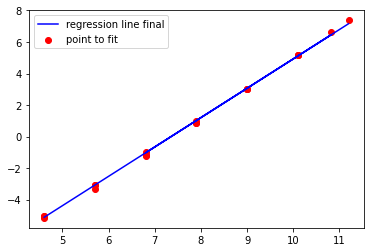

In [9]:
plt.plot(x,m*x+c,color = "b",label="regression line final")
plt.scatter(x, y, color="r", label="point to fit")
plt.legend()
plt.show()

In [10]:
m

1.862328715737887

#### As slope is nearly equal to 2, time complexity of brute force method is O(n^2)

<h1><center>GRID METHOD</center></h1>

In [11]:
time = pd.read_csv("gridtime.csv")

In [12]:
time[time['NUM_OF_PARTICLES']==100].head(5)

,NUM_OF_PARTICLES,GRID_SIZE,t_grid,t_gridcalc
0,100,1,136,97324
1,100,1,122,98388
2,100,1,95,97166
3,100,2,99,18773
4,100,2,188,20267


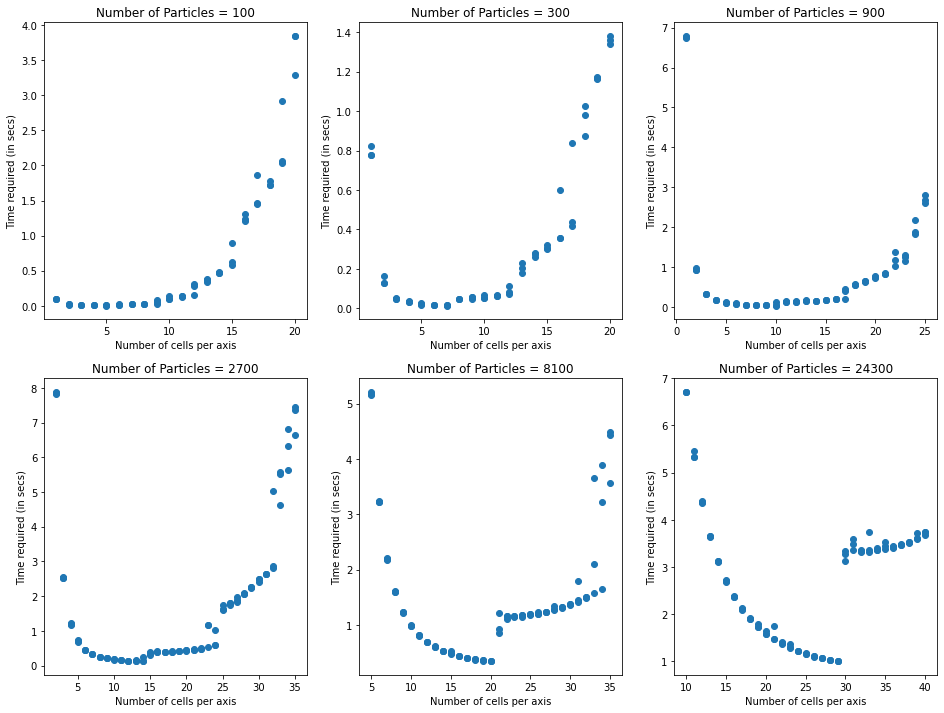

In [13]:
fig, axes = plt.subplots(2,3,figsize=(16, 12))

axes[0,0].set_xlabel("Number of cells per axis")
axes[0,0].set_ylabel("Time required (in secs)")
axes[0,0].set_title("Number of Particles = 100")
axes[0,0].scatter(time[time['NUM_OF_PARTICLES']==100]['GRID_SIZE'], time[time['NUM_OF_PARTICLES']==100]['t_gridcalc']/10**6)

axes[0,1].set_xlabel("Number of cells per axis")
axes[0,1].set_ylabel("Time required (in secs)")
axes[0,1].set_title("Number of Particles = 300")
axes[0,1].scatter(time[time['NUM_OF_PARTICLES']==300]['GRID_SIZE'], time[time['NUM_OF_PARTICLES']==300]['t_gridcalc']/10**6)

axes[0,2].set_xlabel("Number of cells per axis")
axes[0,2].set_ylabel("Time required (in secs)")
axes[0,2].set_title("Number of Particles = 900")
axes[0,2].scatter(time[time['NUM_OF_PARTICLES']==900]['GRID_SIZE'], time[time['NUM_OF_PARTICLES']==900]['t_gridcalc']/10**6)

axes[1,0].set_xlabel("Number of cells per axis")
axes[1,0].set_ylabel("Time required (in secs)")
axes[1,0].set_title("Number of Particles = 2700")
axes[1,0].scatter(time[time['NUM_OF_PARTICLES']==2700]['GRID_SIZE'], time[time['NUM_OF_PARTICLES']==2700]['t_gridcalc']/10**6)

axes[1,1].set_xlabel("Number of cells per axis")
axes[1,1].set_ylabel("Time required (in secs)")
axes[1,1].set_title("Number of Particles = 8100")
axes[1,1].scatter(time[time['NUM_OF_PARTICLES']==8100]['GRID_SIZE'], time[time['NUM_OF_PARTICLES']==8100]['t_gridcalc']/10**6)

axes[1,2].set_xlabel("Number of cells per axis")
axes[1,2].set_ylabel("Time required (in secs)")
axes[1,2].set_title("Number of Particles = 24300")
axes[1,2].scatter(time[time['NUM_OF_PARTICLES']==24300]['GRID_SIZE'], time[time['NUM_OF_PARTICLES']==24300]['t_gridcalc']/10**6)

plt.show()

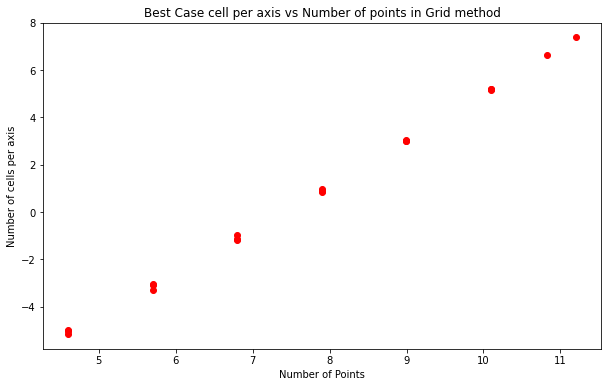

In [14]:
plt.figure(figsize=(10, 6))
plt.title("Best Case cell per axis vs Number of points in Grid method")
plt.xlabel("Number of Points")
plt.ylabel("Number of cells per axis")
plt.scatter(x,y,color='r')
plt.show()

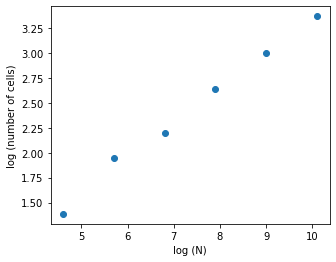

In [15]:
x = np.log(np.array((100,300,900,2700,8100,24300)))
y = np.log(np.array((4,7,9,14,20,29)))

plt.figure(figsize=(5, 4))
plt.xlabel("log (N)")
plt.ylabel("log (number of cells)")
plt.scatter(x,y)
plt.show()

## Linear regression to find best number of cell per axis

In [16]:
m,c,a = 0,0,0.01

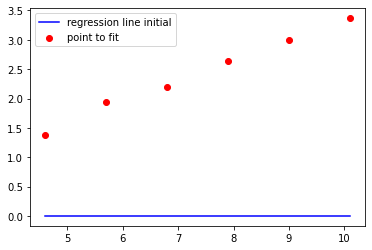

In [17]:
plt.plot(x,m*x+c,color = "b",label="regression line initial")
plt.scatter(x, y, color="r", label="point to fit")
plt.legend()
plt.show()

In [18]:
error = 0
error_diff = 1
while error_diff>0.0001:
    diff = y - (m*x + c)
    error_diff = abs(np.sum(diff**2) - error)
    error = np.sum(diff**2)
    dm = np.sum(diff*x) / len(x)
    dc = np.sum(diff) / len(x)
    m += dm*a
    c += dc*a
    print('error =', error)
    print('m=',m,'c=',c,'\n\n')

error = 37.813890857572886
m= 0.1904082542684753 c= 0.024219190867778576 


error = 6.536817330435416
m= 0.26942219249505384 c= 0.03419794446956742 


error = 1.152083156471877
m= 0.3022159571856875 c= 0.038268042121558384 


error = 0.22502264302079084
m= 0.3158318601146283 c= 0.039886539300612776 


error = 0.065403594350079
m= 0.32149040374039534 c= 0.0404878510486638 


error = 0.037908723311451294
m= 0.32384724311659785 c= 0.04066715047613855 


error = 0.03316061569213903
m= 0.32483412096863157 c= 0.04067138912752623 


error = 0.03232865096133998
m= 0.32525256359580257 c= 0.040603033084394585 


error = 0.03217091419510103
m= 0.3254351434487283 c= 0.04050459795127449 


error = 0.03212927122654839
m= 0.32551985280105783 c= 0.040393724444780864 




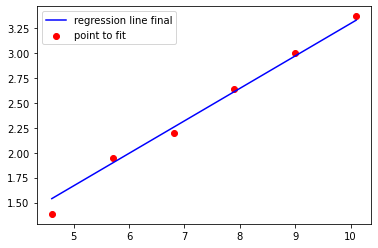

In [19]:
plt.plot(x,m*x+c,color = "b",label="regression line final")
plt.scatter(x, y, color="r", label="point to fit")
plt.legend()
plt.show()

In [25]:
m,1/m,c

(0.32551985280105783, 3.072009253491375, 0.040393724444780864)

#### As slope is nearly 1/3 and intercept nearly 0, the ideal value of cells per axis is N^(1/3)

## Time complexity of Grid method

In [30]:
time = pd.read_csv("gridtime2.csv")

In [31]:
time.head()

,NUM_OF_PARTICLES,GRID_SIZE,t_grid,t_gridcalc
0,100,4,158,5888
1,100,4,149,7849
2,100,4,142,5360
3,500,8,982,27042
4,500,8,1030,25371


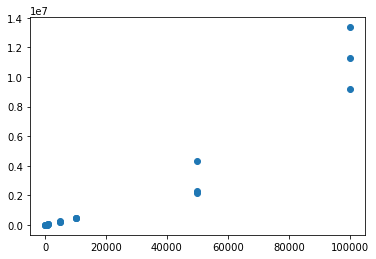

In [32]:
plt.scatter(x=time['NUM_OF_PARTICLES'],y=time['t_grid']+time['t_gridcalc'])